### Question 5(a) Run the next few cells (before part b) to perform compression with SVD on the image "Wave". Put the image file in the same folder as the your .ipynb file.

In [1]:
import numpy as np  # for matrices, array, linear algebra
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(860, 1280, 3)


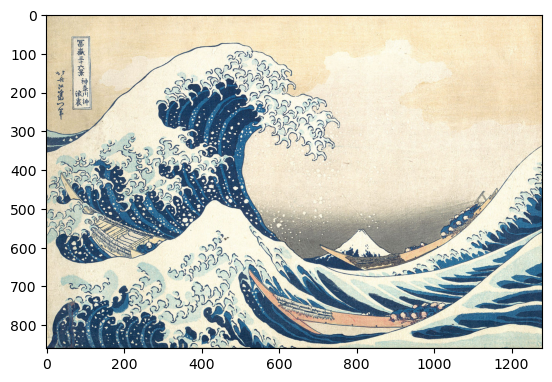

In [2]:
im = mpimg.imread('Wave.jpg')  # Read the image and convert it to a matrix representing the image
plt.imshow(im) # show the image
print(im.shape) # print the size of the color image matrix: (m,n,3), evey pixel is an RGB 3-vector

In [3]:
# Function to convert an image to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

(860, 1280)


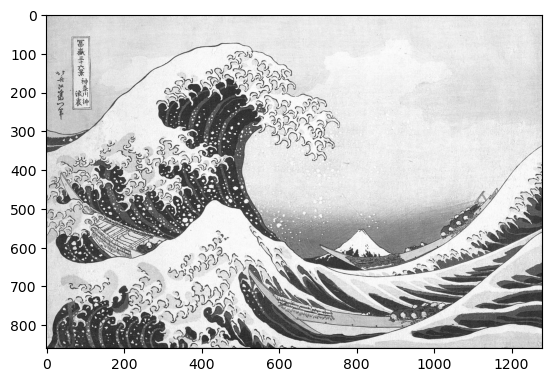

In [4]:
im_g = rgb2gray(im) # Converting the image to grayscale
plt.imshow(im_g, cmap=plt.get_cmap('gray')) # Display the black and white image
print(im_g.shape) # print the size of the grayscale image matrix: (m,n)
plt.show()

* Perform SVD on $A$:

The command `np.linalg.svd` returns three matrices $U$, $S$ (representing $\Sigma$), and $Vh$ (representing $V^T$), such that $A=U\Sigma V^T$.

In [5]:
U, S, Vh = np.linalg.svd(im_g, full_matrices=True)
V = np.transpose(Vh)

# Recover sigma from S
sigma = np.zeros((U.shape[1],V.shape[0]))
np.fill_diagonal(sigma, S)

print ("The shape of U, S, and V:", U.shape, sigma.shape, V.shape)
print("First 20 singular values:")
print(S[:20])  # Print the first 20 singular values, notice they are in decreasing order.

The shape of U, S, and V: (860, 860) (860, 1280) (1280, 1280)
First 20 singular values:
[204041.64669699  27333.33384501  17622.2814352   16501.17994254
  13707.76683514  12842.63843929  10539.51959831   9759.41612702
   9405.91471329   8726.23281248   8160.18115075   7577.85813636
   7447.33784015   7256.35972616   6976.64699891   6635.98882028
   6261.05630704   6044.59937332   5606.74225103   5555.22950688]


* Find the $\rm{cutoff}$ such that $\sigma_i<0.01\sigma_1$ for $i\geq \rm{cutoff}$.
* Reconstruct $A$ with $\sigma_1\underline{u}_1, ..., \sigma_\mathrm{cutoff} \underline{u}_\mathrm{cutoff}$ and $\underline{v}_1, ..., \underline{v}_\mathrm{cutoff}$, with smaller $U$, $\Sigma$, and $V$.

Number of singular values used: 120
Size of reduced U, S, V: (860, 120) (120, 120) (1280, 120)
Data compression percentage: 23.328488372093023 %


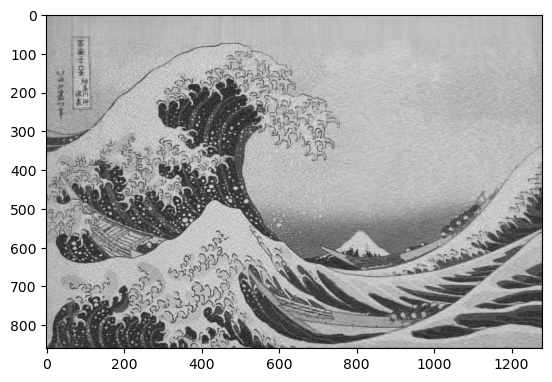

In [6]:
min_s = S[0]*0.01    # include singular values greater than 0.01 of the largest singular value
S_new = S[S > min_s]   # take values greater than mins
cutoff = np.shape(S_new)[0]       # number of singular values we will use
U2 = U[:, 0:cutoff]; # Reduce U matrix
V2 = V[:, 0:cutoff]; # reduce V matrix
sigma2 = sigma[0:cutoff,0:cutoff]
print ("Number of singular values used:", cutoff)
print ("Size of reduced U, S, V:", U2.shape, sigma2.shape, V2.shape)
m=im_g.shape[0]
n=im_g.shape[1]
print ("Data compression percentage:", 100*cutoff*(m+n)/(m*n), "%")
new_im = np.matmul(np.matmul(U2,sigma2),np.transpose(V2))
plt.imshow(new_im, cmap=plt.get_cmap('gray'))

### Question 5(b) Experiment with different min_s values and find the best compromise between performance (how good the picture looks) and cost (compression %). The output of your last cell should represent that compromise.

### Question 5(c) Load your favorite picture and write code to repeat (a) and (b).

Number of singular values used: 35
Size of reduced U, S, V: (860, 35) (35, 35) (1280, 35)
Data compression percentage: 6.804142441860465 %


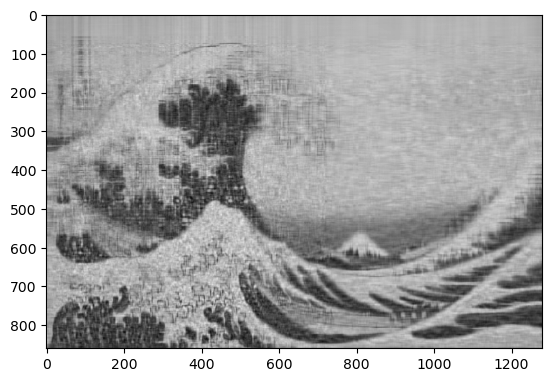

In [7]:
min_s = S[0]*0.02    # include singular values greater than 0.01 of the largest singular value
S_new = S[S > min_s]   # take values greater than mins
cutoff = np.shape(S_new)[0]       # number of singular values we will use
U2 = U[:, 0:cutoff]; # Reduce U matrix
V2 = V[:, 0:cutoff]; # reduce V matrix
sigma2 = sigma[0:cutoff,0:cutoff]
print ("Number of singular values used:", cutoff)
print ("Size of reduced U, S, V:", U2.shape, sigma2.shape, V2.shape)
m=im_g.shape[0]
n=im_g.shape[1]
print ("Data compression percentage:", 100*cutoff*(m+n)/(m*n), "%")
new_im = np.matmul(np.matmul(U2,sigma2),np.transpose(V2))
plt.imshow(new_im, cmap=plt.get_cmap('gray'))

Number of singular values used: 17
Size of reduced U, S, V: (860, 17) (17, 17) (1280, 17)
Data compression percentage: 3.3048691860465116 %


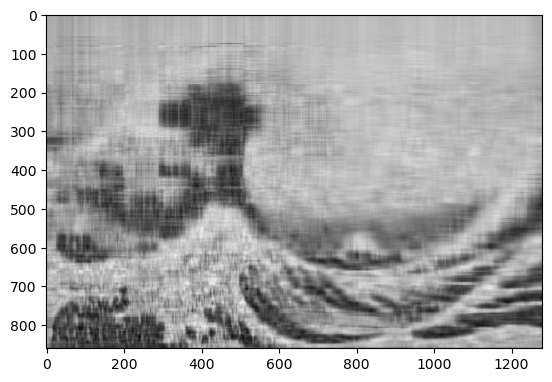

In [8]:
min_s = S[0]*0.03    # include singular values greater than 0.01 of the largest singular value
S_new = S[S > min_s]   # take values greater than mins
cutoff = np.shape(S_new)[0]       # number of singular values we will use
U2 = U[:, 0:cutoff]; # Reduce U matrix
V2 = V[:, 0:cutoff]; # reduce V matrix
sigma2 = sigma[0:cutoff,0:cutoff]
print ("Number of singular values used:", cutoff)
print ("Size of reduced U, S, V:", U2.shape, sigma2.shape, V2.shape)
m=im_g.shape[0]
n=im_g.shape[1]
print ("Data compression percentage:", 100*cutoff*(m+n)/(m*n), "%")
new_im = np.matmul(np.matmul(U2,sigma2),np.transpose(V2))
plt.imshow(new_im, cmap=plt.get_cmap('gray'))


Number of singular values used: 23
Size of reduced U, S, V: (860, 23) (23, 23) (1280, 23)
Data compression percentage: 4.471293604651163 %


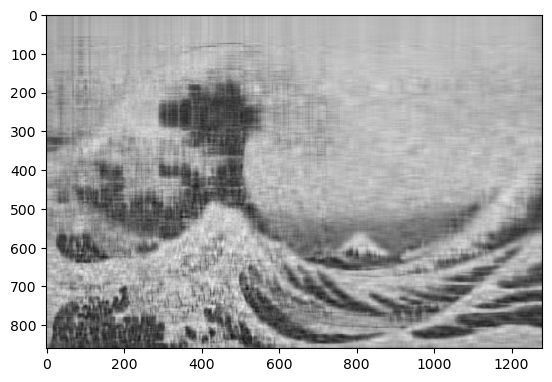

In [9]:
min_s = S[0]*0.025    # include singular values greater than 0.01 of the largest singular value
S_new = S[S > min_s]   # take values greater than mins
cutoff = np.shape(S_new)[0]       # number of singular values we will use
U2 = U[:, 0:cutoff]; # Reduce U matrix
V2 = V[:, 0:cutoff]; # reduce V matrix
sigma2 = sigma[0:cutoff,0:cutoff]
print ("Number of singular values used:", cutoff)
print ("Size of reduced U, S, V:", U2.shape, sigma2.shape, V2.shape)
m=im_g.shape[0]
n=im_g.shape[1]
print ("Data compression percentage:", 100*cutoff*(m+n)/(m*n), "%")
new_im = np.matmul(np.matmul(U2,sigma2),np.transpose(V2))
plt.imshow(new_im, cmap=plt.get_cmap('gray'))

Number of singular values used: 27
Size of reduced U, S, V: (860, 27) (27, 27) (1280, 27)
Data compression percentage: 5.2489098837209305 %


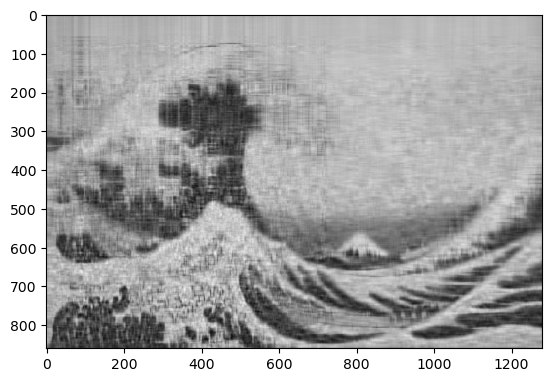

In [10]:
min_s = S[0]*0.0225    # include singular values greater than 0.01 of the largest singular value
S_new = S[S > min_s]   # take values greater than mins
cutoff = np.shape(S_new)[0]       # number of singular values we will use
U2 = U[:, 0:cutoff]; # Reduce U matrix
V2 = V[:, 0:cutoff]; # reduce V matrix
sigma2 = sigma[0:cutoff,0:cutoff]
print ("Number of singular values used:", cutoff)
print ("Size of reduced U, S, V:", U2.shape, sigma2.shape, V2.shape)
m=im_g.shape[0]
n=im_g.shape[1]
print ("Data compression percentage:", 100*cutoff*(m+n)/(m*n), "%")
new_im = np.matmul(np.matmul(U2,sigma2),np.transpose(V2))
plt.imshow(new_im, cmap=plt.get_cmap('gray'))